In this notebook, I familiarize myself with the data. I look at data types to be sure that they are correct and make note of missing data and data that I will want to encode.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges is and object type and needs to be a numerical type.

In [3]:
df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce')

The Senior Citizen column does not follow the format of the rest of the data. I am going to make zeros 'No' and ones 'Yes'. This is not necessary because I will be encoding anyway, but for the sake of consistiency, I did it anyway.

In [4]:
df_raw['SeniorCitizen'] = df_raw['SeniorCitizen'].map(lambda x: 'No' if x == 0 else 'Yes')

Most columns are categorical and are one of two or three options ('Yes', 'No', or 'NA'/'third option')

In [5]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


I am looking at which columns to encode, scale, or impute and how to do that. I'll make lists later.

Make the column names easier to use and print out the number of unique values per column.

In [6]:
df_raw.columns = df_raw.columns.str.lower()

Pull out the customer id's because I don't want to lose the data, but I also don't want to graph it. I also engineered two new features from the few numerical columns. The first is the total charges a customer incured divided by how long they have had the service. I thought that people who were charged a lot in a short time might churn more. I also divided monthly charges by total charges so that higher ratios relate to higher average monthly charges. The rest are all Griffin's features.

In [7]:
cust_id = df_raw['customerid']
# df_raw['monchg_per_tenure'] = df_raw['monthlycharges'] / df_raw['tenure']
df_raw['totchg_per_tenure'] = df_raw['totalcharges'] / df_raw['tenure']
df_raw['monthly_div_tot'] = df_raw['monthlycharges'] / df_raw['totalcharges']

df_raw['partner_cont'] = df_raw['partner'].map({'No': 0, 'Yes': 1, })
df_raw['dependent_cont'] = df_raw['dependents'].map({'No': 0, 'Yes': 1, })
df_raw['single_parent'] = df_raw['partner_cont'] + df_raw['dependent_cont']
df_raw['single_parent'] = df_raw['single_parent'].map({1: 'No', 0: 'No', 2: 'Yes' })
df_raw.drop(['partner_cont', 'dependent_cont'], axis=1, inplace=True)
df_raw['phone_count'] = df_raw['phoneservice'].map({'No': 0, 'Yes': 1, })
df_raw['internet_count'] = df_raw['internetservice'].map({'No': 0, 'DSL': 1, 'Fiber optic': 1 })
df_raw['phone_and_internet'] = df_raw['phone_count'] + df_raw['internet_count']
df_raw['phone_and_internet'] = df_raw['phone_and_internet'].map({1: 'No', 0: 'No', 2: 'Yes' })
df_raw.drop(['phone_count', 'internet_count'], axis=1, inplace=True)

df_raw['o_sec'] = df_raw['onlinesecurity'].map({'No': 0, 'Yes': 1})
df_raw['o_back'] = df_raw['onlinebackup'].map({'No': 0, 'Yes': 1})
df_raw['t_sup'] = df_raw['techsupport'].map({'No': 0, 'Yes': 1})
df_raw['tv'] = df_raw['streamingtv'].map({'No': 0, 'Yes': 1})
df_raw['movie'] = df_raw['streamingmovies'].map({'No': 0, 'Yes': 1})
df_raw['protect'] = df_raw['deviceprotection'].map({'No': 0, 'Yes': 1})
df_raw['num_of_internet_services'] = df_raw['o_sec'] + df_raw['o_back'] + df_raw['t_sup'] + df_raw['tv'] + df_raw['movie']
df_raw['num_of_services'] = df_raw['num_of_internet_services'] + df_raw['protect']
df_raw.drop(['o_back', 't_sup', 'tv', 'movie','protect'], axis=1, inplace=True)
df_raw.drop('o_sec', axis=1, inplace=True)



df = df_raw.drop('customerid',axis=1)


In [8]:
df.isna().sum()

gender                         0
seniorcitizen                  0
partner                        0
dependents                     0
tenure                         0
phoneservice                   0
multiplelines                  0
internetservice                0
onlinesecurity                 0
onlinebackup                   0
deviceprotection               0
techsupport                    0
streamingtv                    0
streamingmovies                0
contract                       0
paperlessbilling               0
paymentmethod                  0
monthlycharges                 0
totalcharges                  11
churn                          0
totchg_per_tenure             11
monthly_div_tot               11
single_parent                  0
phone_and_internet             0
num_of_internet_services    1526
num_of_services             1526
dtype: int64

Missing values in the total charges column. I'll take care of them later with an imputer and fill them in with zeros. I think that they are customers that haven't been charged yet.

In [9]:
#how many uniques?
for col in df_raw.columns:
    print(col,df_raw[col].nunique())

customerid 7043
gender 2
seniorcitizen 2
partner 2
dependents 2
tenure 73
phoneservice 2
multiplelines 3
internetservice 3
onlinesecurity 3
onlinebackup 3
deviceprotection 3
techsupport 3
streamingtv 3
streamingmovies 3
contract 3
paperlessbilling 2
paymentmethod 4
monthlycharges 1585
totalcharges 6530
churn 2
totchg_per_tenure 6585
monthly_div_tot 6420
single_parent 2
phone_and_internet 2
num_of_internet_services 6
num_of_services 7


I need to encode this data to use it in models so I made lists for each type to do.

In [10]:
ord_encode = ['gender','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup',
              'deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod','single_parent','phone_and_internet','seniorcitizen']
labelencode =['churn']
num = ['tenure','monthlycharges','totalcharges','totchg_per_tenure','monthly_div_tot','num_of_internet_services','num_of_services']

Make feature and target sets

In [11]:
X = df[ord_encode].join(df[num],how='left')
y = df[labelencode]



There are some missing values that need to be filled in total charges. I am using 0 because those customers probably have not been charged yet. It will also fill the engineered columns with zero. This is ok because of how they were canculated.

In [12]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='constant',fill_value=0)

X_imp = impute.fit_transform(X)
X_proc = pd.DataFrame(X_imp,columns=X.columns)


In [13]:
# from sklearn.preprocessing import OrdinalEncoder
# #ord encode categoticals
# ordi = OrdinalEncoder(dtype=np.int)

# X_proc = ordi.fit_transform(X_proc)
# X_enc = pd.DataFrame(X_proc,columns=X.columns)


Encode churn so that the counts of yes and no can be summed easier.

In [14]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

y_enc = lbl.fit_transform(np.array(y))

y_enc = pd.DataFrame(y_enc,columns=y.columns)

C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
y.value_counts(normalize=True)

churn
No       0.73463
Yes      0.26537
dtype: float64

In [16]:
y_enc.value_counts(normalize=True)

churn
0        0.73463
1        0.26537
dtype: float64

I checked that the yes/no got turned into 1/0 instead of the other way around.

Join the feature and target frames and then I added a counter column which helps with some groupby stuff.

In [17]:
df_enc = X.join(y_enc,how='left')

This gives a good look at which categories are related to churn

In [18]:
df_raw['counter'] = 1
df_raw.groupby(by=['paymentmethod','churn']).sum()

tenure  monthlycharges  totalcharges  \
paymentmethod             churn                                         
Bank transfer (automatic) No      60623        83653.55    4162668.15   
                          Yes      6783        20091.90     585611.75   
Credit card (automatic)   No      59471        83285.25    4126333.55   
                          Yes      6385        17946.60     545259.80   
Electronic check          No      41584        96056.25    3377326.85   
                          Yes     17954        84288.75    1567576.40   
Mailed check              No      32709        53990.70    1526913.25   
                          Yes      2481        16803.60     164478.95   

                                 totchg_per_tenure  monthly_div_tot  \
paymentmethod             churn                                       
Bank transfer (automatic) No          83528.607875        62.918646   
                          Yes         20062.362951        42.165787   
Credit card (automatic)   No          83263.501792        69.894796   
                          Yes         17913.842709        33.751393   
Electronic check          No          96050.256904       162.969154   
                          Yes         84307.713889       334.839660   
Mailed check              No          53711.614331       239.330414   
                          Yes         16831.645921       162.316341   

                                 num_of_internet_services  num_of_services  \
paymentmethod             churn                                              
Bank transfer (automatic) No                       2673.0           3223.0   
                          Yes                       457.0            553.0   
Credit card (automatic)   No                       2691.0           3285.0   
                          Yes                       444.0            527.0   
Electronic check          No                       2537.0           3036.0   
                          Yes                      1584.0           1893.0   
Mailed check              No                       1270.0           1504.0   
                          Yes                       275.0            332.0   

                                 counter  
paymentmethod             churn           
Bank transfer (automatic) No        1286  
                          Yes        258  
Credit card (automatic)   No        1290  
                          Yes        232  
Electronic check          No        1294  
                          Yes       1071  
Mailed check              No        1304  
                          Yes        308

looks like larger totchg_per_tenure is related to churn. Also half of check payment methods churn. Below, I make new dataframes for churn of not. Then, I can make plots right next to each other because I couldn't figure out how to put them in one chart.

In [19]:
churned = df_raw.loc[df_raw['churn'] == 'Yes']
not_churned = df_raw.loc[df_raw['churn'] == 'No']


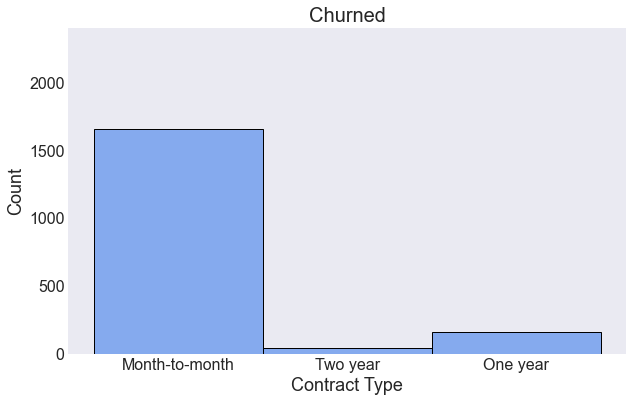

In [83]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.histplot(x='contract',data=churned,color='cornflowerblue')
ax = plt.title('Churned',fontsize=20)
ax = plt.ylim(0,2400)
ax = plt.ylabel('Count',fontsize=18)
ax = plt.xlabel('Contract Type',fontsize=18)

ax = plt.xticks(fontsize=16)
ax = plt.yticks(fontsize=16)

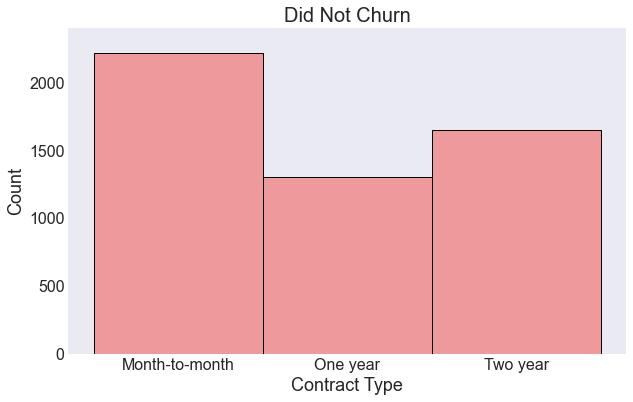

In [82]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.histplot(x='contract',data=not_churned,color='lightcoral')
ax = plt.title('Did Not Churn',fontsize=20)
ax = plt.ylim(0,2400)

ax = plt.ylabel('Count',fontsize=18)
ax = plt.xlabel('Contract Type',fontsize=18)

ax = plt.xticks(fontsize=16)
ax = plt.yticks(fontsize=16)

I started by defining the columns that I wanted to plot and taking out features that don't need to be plotted. I used a count plot for categoricals and a hist plot for numeric data because it runs faster and the bins automatically format.

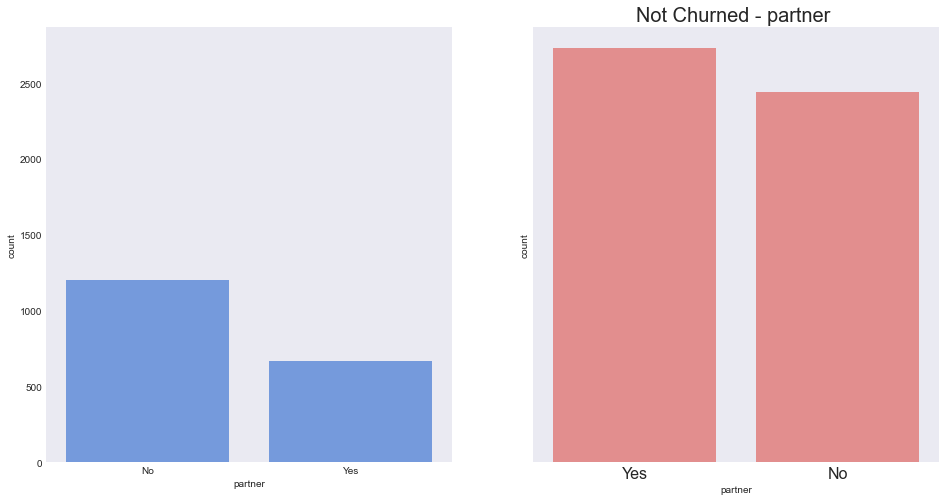

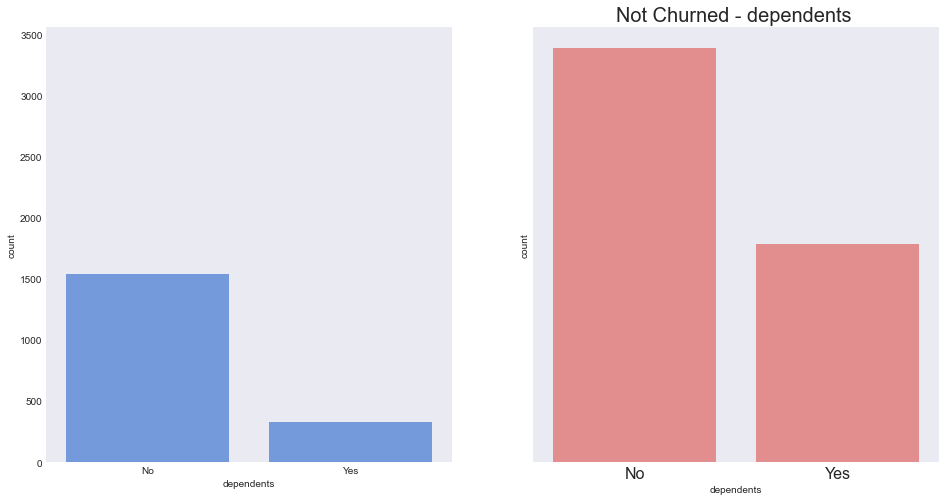

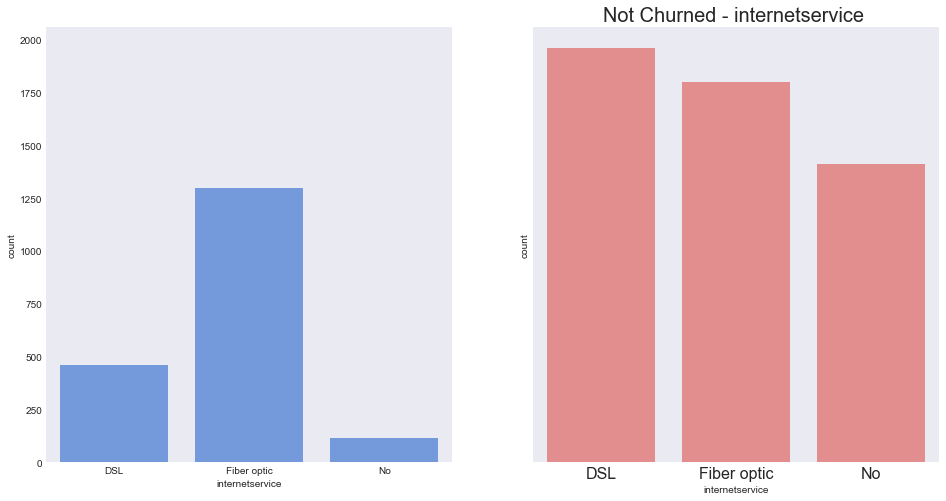

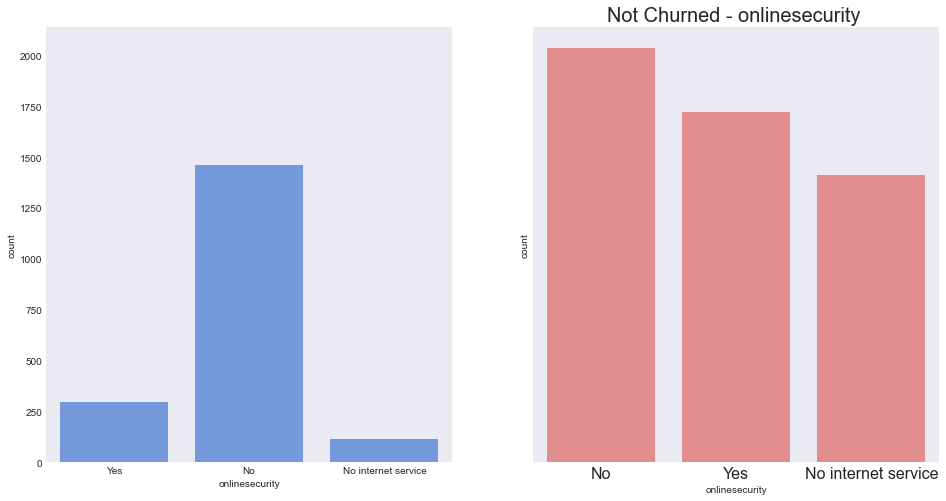

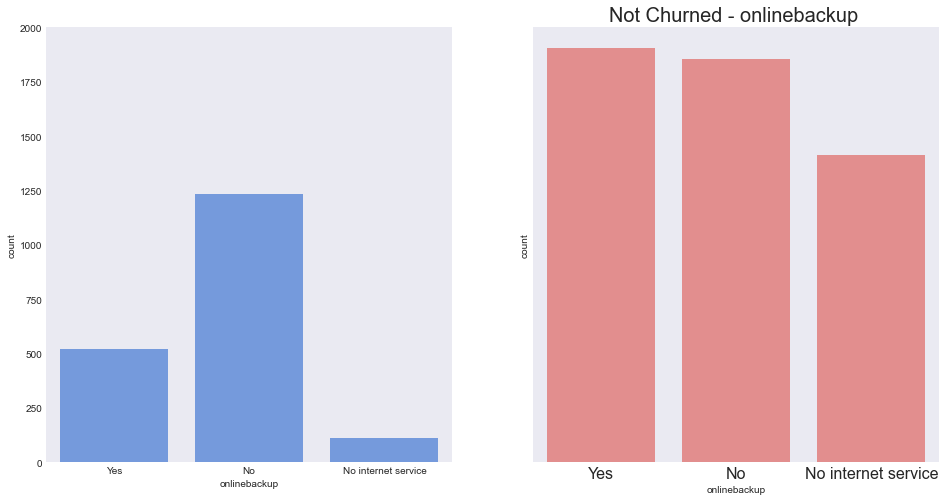

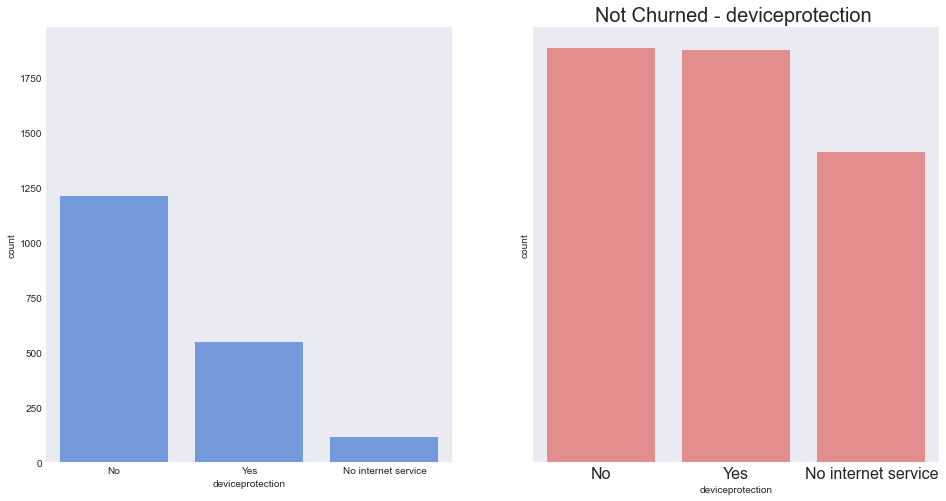

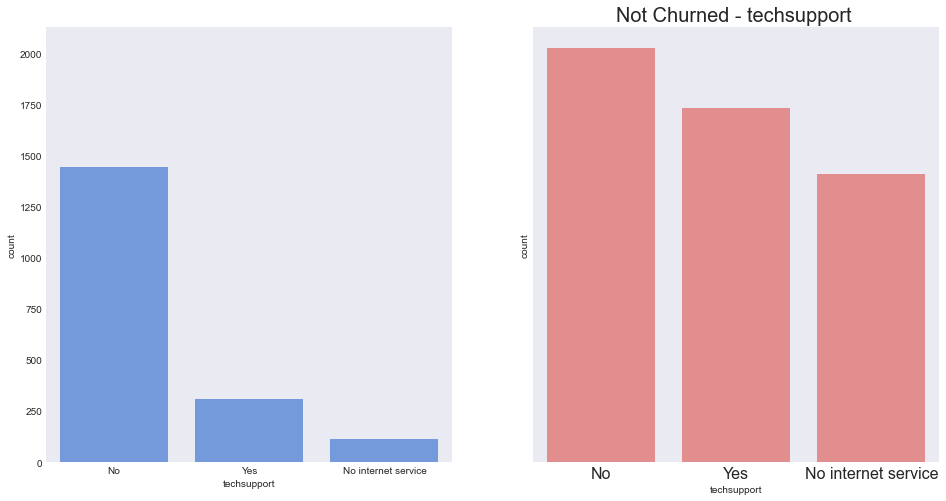

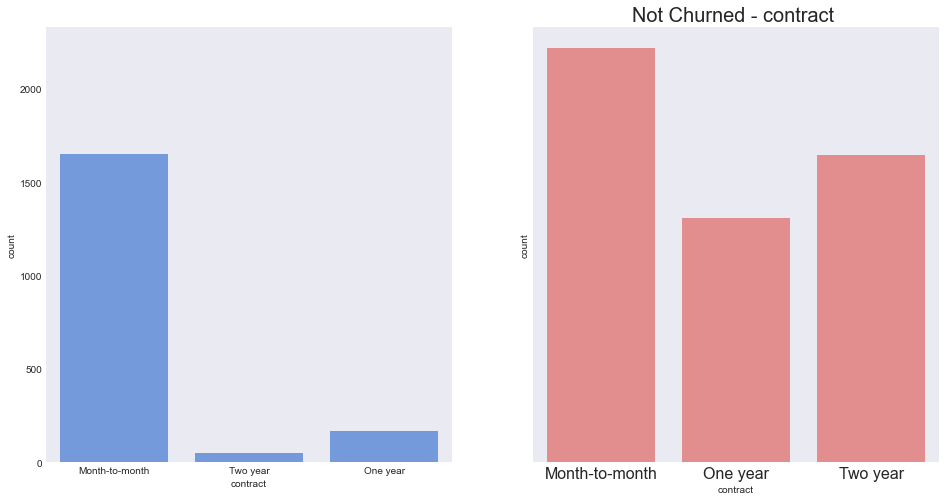

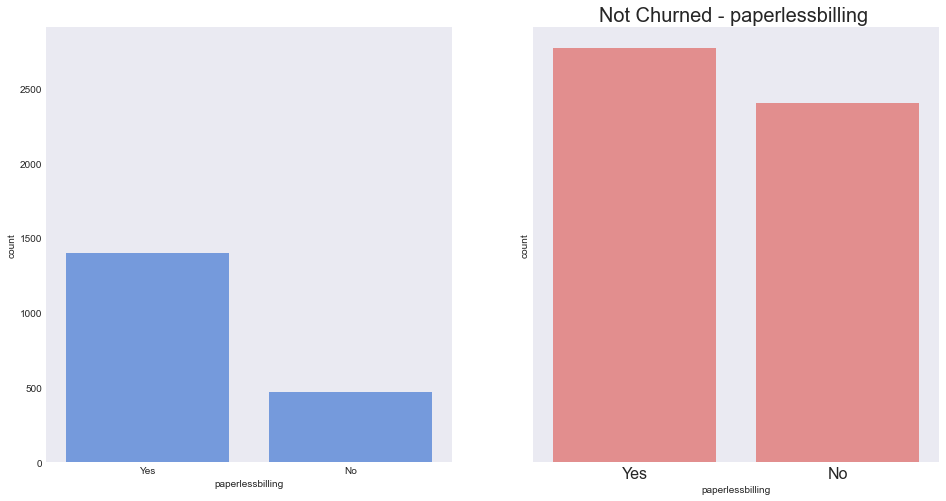

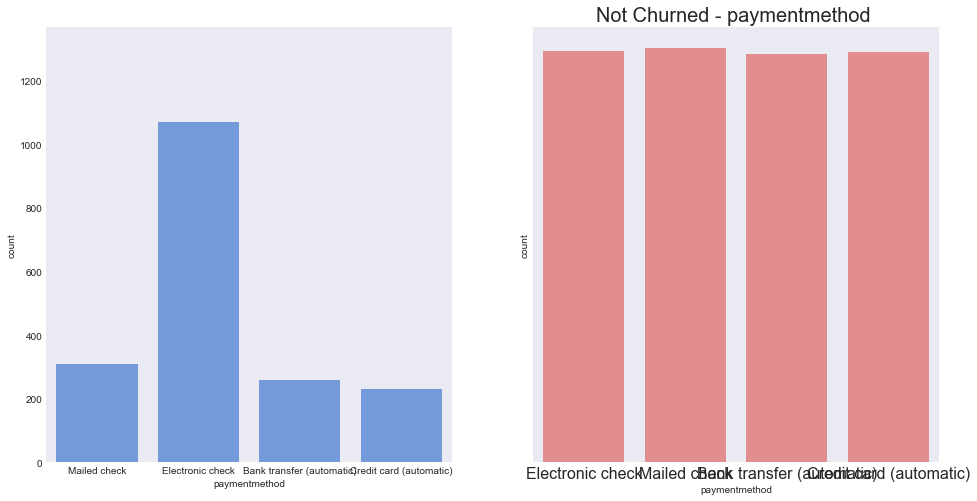

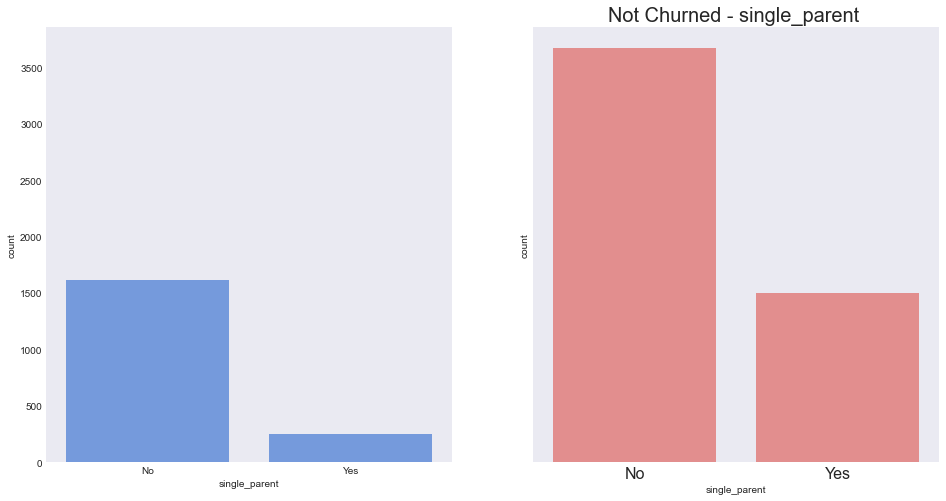

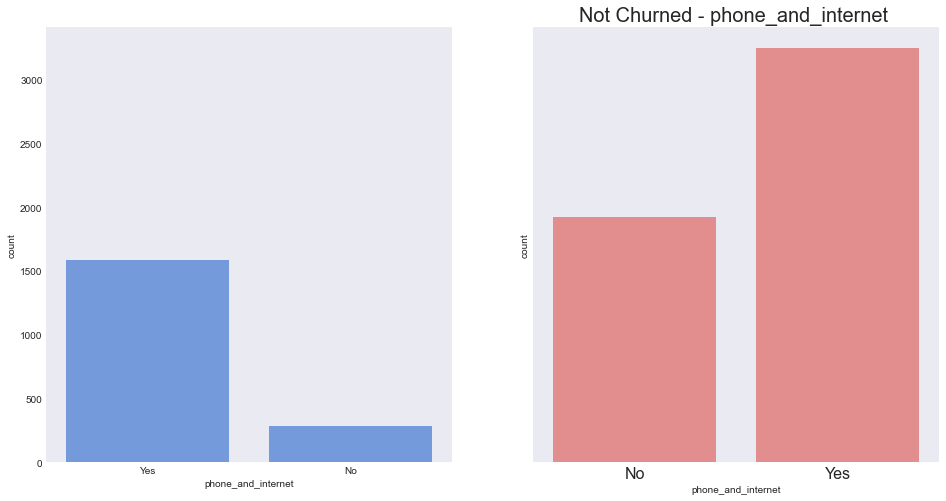

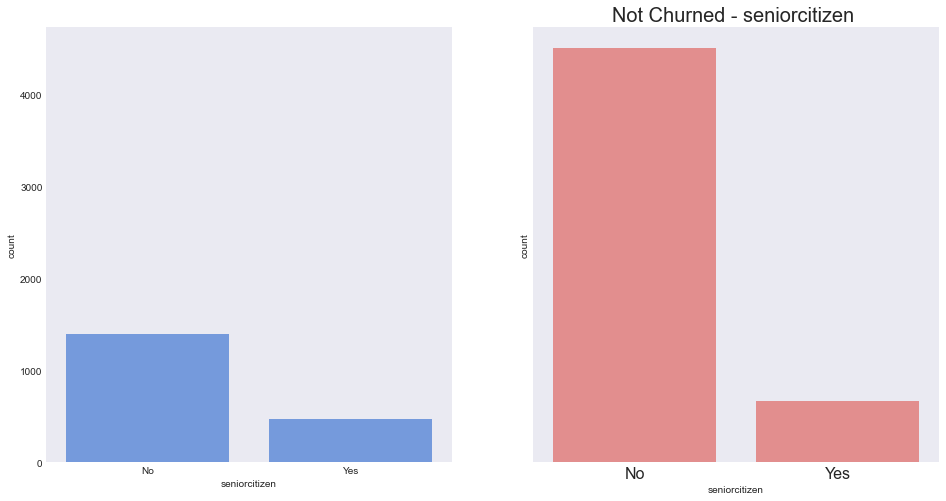

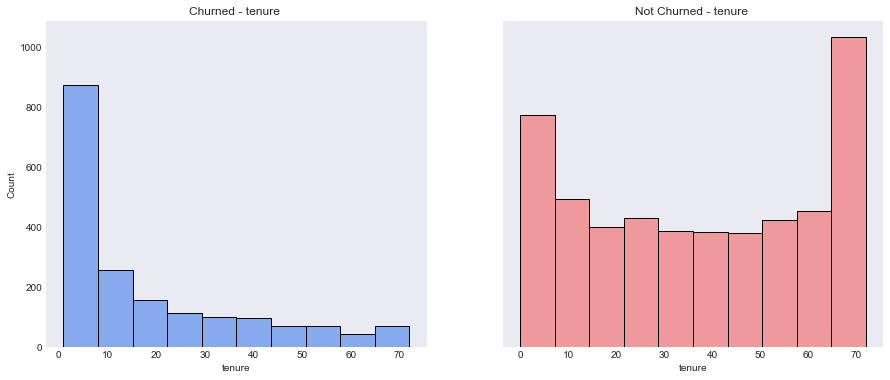

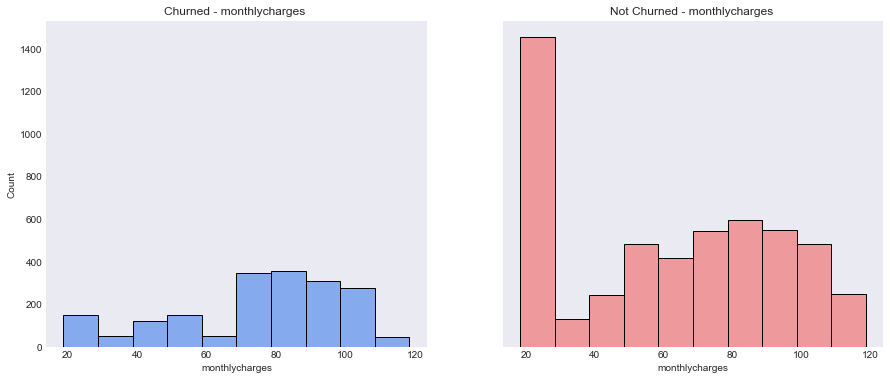

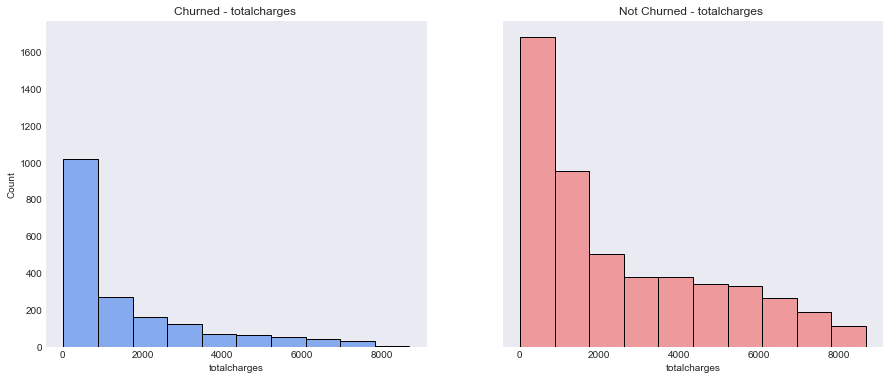

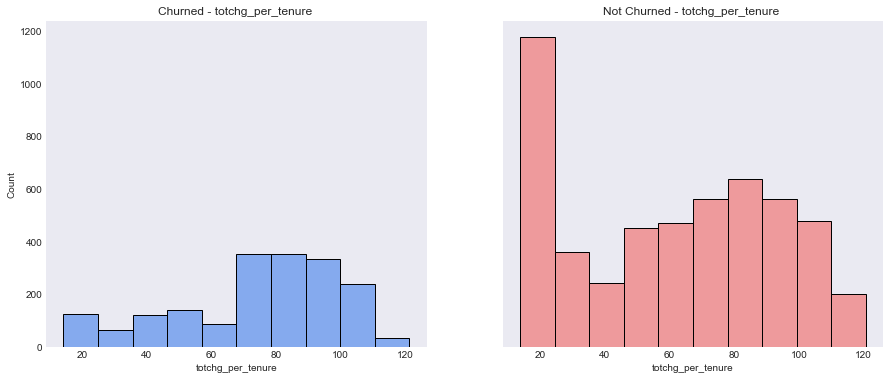

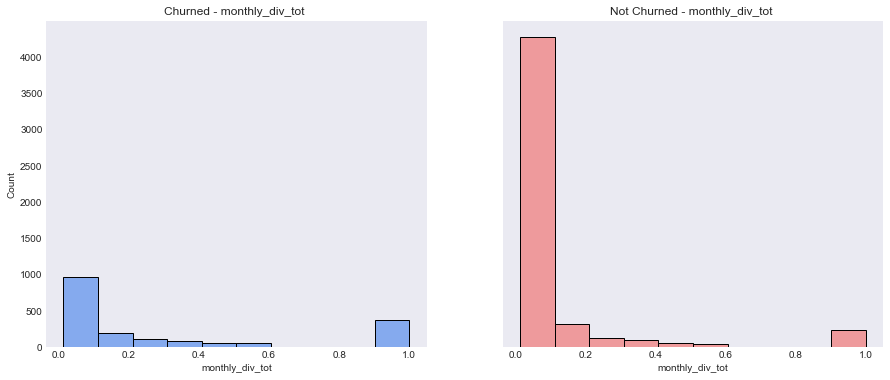

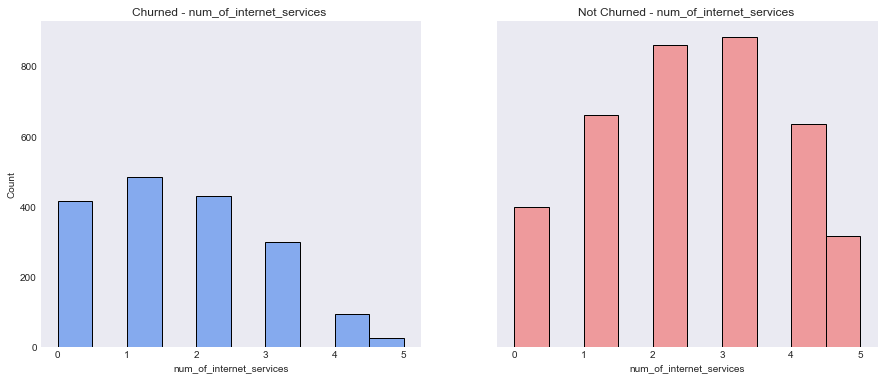

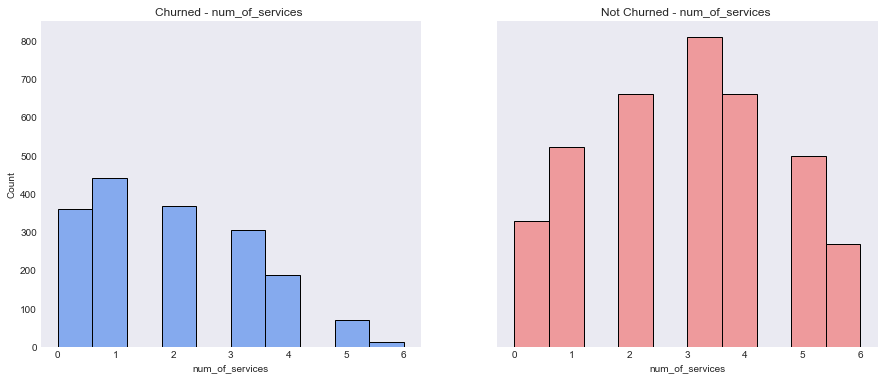

In [30]:
interesting_cols = ['partner','dependents','internetservice','onlinesecurity','onlinebackup',
              'deviceprotection','techsupport','contract','paperlessbilling','paymentmethod','single_parent','phone_and_internet','seniorcitizen']

numerics = ['tenure','monthlycharges','totalcharges','totchg_per_tenure','monthly_div_tot','num_of_internet_services','num_of_services']

plt.style.use('seaborn-dark')

for col in churned[interesting_cols]:
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8),sharey=True)
    
    sns.countplot(x=col,data=churned,ax=ax[0],color='cornflowerblue')

    sns.countplot(x=col,data=not_churned,ax=ax[1],color='lightcoral')
    ax[0] = plt.title(f'Churned - {col} ',fontsize=20)
    ax[1] = plt.title(f'Not Churned - {col} ',fontsize=20)
    
    ax[0] = plt.xticks(fontsize=16)
    ax[0] = plt.yticks(fontsize=16)
    ax[1] = plt.xticks(fontsize=16)
    ax[1] = plt.yticks(fontsize=16)
for col in churned[numerics]:
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6),sharey=True)

    sns.histplot(x=col,data=churned,ax=ax[0],color='cornflowerblue',bins=10)
    sns.histplot(x=col,data=not_churned,ax=ax[1],color='lightcoral',bins=10)
    ax[0].title.set_text(f'Churned - {col} ')
    ax[1].title.set_text(f'Not Churned - {col} ')
    


From these graphs, more people without dependents dropped their service. Also, those who hadn't been with the company long (tenure) dropped more. Most drops were month to month contracts and electronic checks. Additionally, people without a large total charge dropped more. This makes sense because people who had a low tenure wouldn't be able to get a lot of total charges.

Those who got charged a lot in a short amount of time churned more.